# rating 테이블 간단한 EDA

## 데이터 다운로드

In [1]:
#import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_row', 50)

In [2]:
train = pd.read_csv('../data/train_ratings.csv')
test = pd.read_csv('../data/test_ratings.csv')
print(train.shape)
print(test.shape)

(306795, 3)
(76699, 3)


In [3]:
train_counts = train.groupby('user_id')['rating'].count().sort_values(ascending=False)
test_counts = test.groupby('user_id')['rating'].count().sort_values(ascending=False)

## User 관해서

In [4]:
print(len(train_counts))
print(len(test_counts))

59803
26167


train 데이터 사용자는 약 6만명, test 데이터 사용자는 약 2만 6천명 입니다.

In [5]:
len(set(test['user_id']) - set(train['user_id']))

8266

test 데이터 약 2만 6천명 중 8천명 정도는 train 내 없는 데이터 입니다.

좋은 모델을 위해선 cold start에 대한 대비가 필요합니다. 

다음으로 한 유저가 몇 권의 책을 읽는지 알아봅시다.

In [6]:
train_counts[:10]

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
235105     812
76499      810
171118     771
16795      760
248718     747
Name: rating, dtype: int64

11676, 98391 두 사용자가 압도적인 독서량을 보입니다.

In [7]:
test_counts[:10]

user_id
11676     1419
98391     1125
189835     396
153662     347
23902      223
235105     208
76499      201
16795      198
248718     194
171118     189
Name: rating, dtype: int64

테스트 데이터도 train 데이터와 비슷한 사용자가 독서를 많이하는 경향을 보입니다.

이것으로 볼 때 train과 test는 시간 등의 기준 요소 없이 단순히 분할 되었음을 알 수 있습니다.

실제로 valid 데이터 셋을 만들 때 단순히 분할해도 큰 문제가 없을 것 같아요.

<AxesSubplot:>

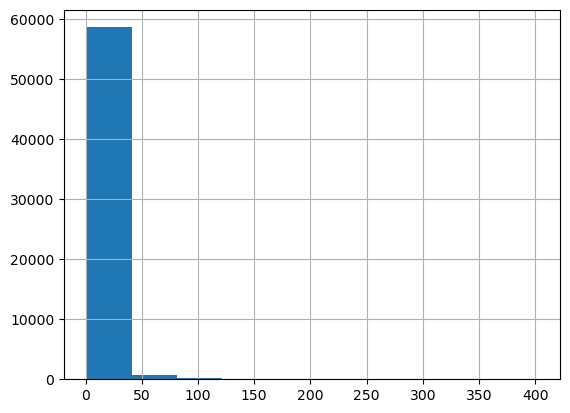

In [8]:
train_counts[20:].hist()

책을 극단적으로 많이 읽은 일부 인원을 제외한 분포입니다.

역시 대부분에 인원은 50권 이상 책을 읽긴 힘들군요. 당연한 결과입니다.

In [9]:
n = 5
_ratio = np.round(len(train_counts[train_counts < n]) / len(train_counts), 3) * 100
print(f'책을 {n}권 이하로 읽은 사람의 비율은 {_ratio} 입니다.')

책을 5권 이하로 읽은 사람의 비율은 82.1 입니다.


조금 더 상세한 수치를 알 수 있는 코드입니다. 대부분 인원은 책을 몇권 안 읽었습니다.

## 책에 관해서

In [10]:
books = pd.read_csv('../data/books.csv')
books.drop(['img_url', 'img_path'], axis = 1, inplace = True)
books.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher,language,category,summary
59310,0752999729,SECOND LADY,IRVING WALLACE,1997.0,Random House UK Ltd (A Division of Random Hous...,NaN,NaN,NaN
23520,1582341141,Mangoes and Quince: A Novel,Carol Field,2001.0,Bloomsbury Publishing (NY),en,['Fiction'],"A feast of the imagination, Mangoes and Quince..."
143828,0810914824,The Perfect Setting,Peri Wolfman,1995.0,Harry N Abrams Inc,en,['Cooking'],"Filled with useful ideas, this is a stylish bo..."
13391,0553211439,A Connecticut Yankee in King Arthur's Court (B...,Mark Twain,1994.0,Bantam Books,en,['Fiction'],A stoical New Englander is transported to sixt...
23429,1569710732,Dark Empire (Star Wars),Tom Veitch,1995.0,Dark Horse Comics,NaN,NaN,NaN


In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   language             82343 non-null   object 
 6   category             80719 non-null   object 
 7   summary              82343 non-null   object 
dtypes: float64(1), object(7)
memory usage: 9.1+ MB


언어, 카테고리, 요약 내용은 null값이 꽤 있는것이 확인됩니다.

In [12]:
n = 10
print('작가의 수 :', books['book_author'].nunique())
books_authors = books.groupby('book_author')['isbn'].count().sort_values(ascending=False)
print(f'{n}권 이상 집필한 작가의 수 :', len(books_authors[books_authors > n]))

작가의 수 : 62059
10권 이상 집필한 작가의 수 : 1841


약 15만권중 책을 쓴 작가는 6만명이 넘습니다. 또 10권 이상 집필한 작가수는 2천명이 안됩니다.

In [13]:
print(books_authors[:10])

book_author
Stephen King           446
Agatha Christie        404
William Shakespeare    381
Barbara Cartland       283
Nora Roberts           241
Terry Pratchett        198
Isaac Asimov           195
Charles Dickens        187
Carolyn Keene          185
Ann M. Martin          183
Name: isbn, dtype: int64


일부 작가는 400권을 넘기기도 하는군요!

![image](https://user-images.githubusercontent.com/79916736/197498312-c2e08d6c-262f-4ae3-bcad-d985f967cf3b.png)


In [18]:
n = 10
print('출판사의 수 :', books['publisher'].nunique())
books_publishers = books.groupby('publisher')['isbn'].count().sort_values(ascending=False)
print(f'{n}권 이상 집필한 출판사의 수 :', len(books_publishers[books_publishers >= n]))

출판사의 수 : 11571
10권 이상 집필한 출판사의 수 : 1549


출판사는 11571개 존재합니다. 10권 이상 출판한 출판사는 1426개로 다소 떨어짐을 알 수 있습니다.

In [19]:
books_publishers[:10]

publisher
Harlequin                   3005
Ballantine Books            2322
Pocket                      2274
Penguin Books               1943
Bantam Books                1938
Berkley Publishing Group    1754
Silhouette                  1684
Warner Books                1667
Scholastic                  1586
Simon & Schuster            1578
Name: isbn, dtype: int64

In [16]:
for i in books_publishers[:10].index:
    print(i)
    print(set(books['publisher'][books['publisher'].str.contains(i)]))

Harlequin
{'Harlequin Romance', 'Harlequin Enterprises', 'Harlequin', 'Harlequin Enterprises Limited', 'Harlequin Mills & Boon Ltd', 'Harlequin Sales Corp (Mm)', 'Harlequin Audio', 'Harlequin Books', 'Harlequin Sales Corp'}
Ballantine Books
{'Ballantine Books', 'Distributed by Ballantine Books', 'Ballantine Books (Mm)', 'Ballantine Books (Trd Pap)', 'Distributed in the U.S. by Ballantine Books'}
Pocket
{'Pocket (FR)', 'MÃ¥nPocket', 'Pocket Jeunesse', 'Paraview Pocket Books', 'TownHouse/Pocket Books', 'ManPocket', 'Pocket', 'Pocket Books (Mm)', 'Pocket Books : Distributed by Simon & Schuster', 'Press Pocket', 'Presses Pocket French', 'Pocket Books', 'Pocket Star Book', 'Pocket Books/TownHouse', 'Presses Pocket', 'Distributed by Pocket Books', 'Pocket Star', 'Pocket French', 'Pocket Classics', 'Pocket Star Books', 'Pocket : France-Inter'}
Penguin Books
{'Penguin Books, Canada', 'Penguin Books Australia Ltd.', 'Penguin Books', 'Penguin Books (NZ)', 'Penguin Books Canada Ltd', 'Granta Book

In [17]:
tem[tem['publisher'] == 'Penguin Books USA']

NameError: name 'tem' is not defined

In [ ]:
tem = books['isbn'][books['publisher'] == 'Penguin Books']
set(tem.apply(lambda x : x[:4]))

{'0140',
 '0141',
 '0142',
 '0143',
 '0146',
 '0147',
 '0451',
 '0452',
 '0670',
 '0802',
 '1594',
 '1854',
 '1898'}

언어, 분류, 요약 내용이 null 인 경우가 꽤 많습니다.

In [ ]:
books['isbn'].nunique()

149570